In [1]:
import pandas as pd

#**LOADING THE DATASET**


In [2]:
df = pd.read_csv('climate_change_data.csv')

In [5]:
df

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164
...,...,...,...,...,...,...,...,...,...
9995,2022-12-27 15:21:06.966696576,South Elaineberg,Bhutan,15.020523,391.379537,-1.452243,93.417109,25.293814,6.531866
9996,2022-12-28 11:30:50.225022464,Leblancville,Congo,16.772451,346.921190,0.543616,49.882947,96.787402,42.249014
9997,2022-12-29 07:40:33.483348224,West Stephanie,Argentina,22.370025,466.042136,1.026704,30.659841,15.211825,18.293708
9998,2022-12-30 03:50:16.741674112,Port Steven,Albania,19.430853,337.899776,-0.895329,18.932275,82.774520,42.424255


#**DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS**

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.3+ KB


#**CHECKING NULL VALUES**

In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
Country,0
Temperature,0
CO2 Emissions,0
Sea Level Rise,0
Precipitation,0
Humidity,0
Wind Speed,0


#**STATISTICAL DESCRIPITION**

In [ ]:
df.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


#**CONVERTING Date COLUMN INTO PROPER FORMATE**

##REMOVING NULL VALUES

In [3]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
Date,0
Location,0
Country,0
Temperature,0
CO2 Emissions,0
Sea Level Rise,0
Precipitation,0
Humidity,0
Wind Speed,0


In [4]:
# Convert to datetime with full information
df['Date'] = pd.to_datetime(df['Date'])

# Format the date column to display only the date in '%Y-%m-%d' format
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')


#**SORTING THE VALUES OF ALL THE ATTRIBUTES**

In [5]:
# Sorting numeric columns individually
sorted_df = pd.DataFrame()
sorted_df['Date'] = df['Date']

# Select only numeric columns to sort
numeric_cols = df.select_dtypes(include=['number']).columns

for column in numeric_cols:
    sorted_df[column] = sorted(df[column])

display(sorted_df)

,Date,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
1,2000-01-01,-3.709565,222.104943,-4.016462,0.013433,0.024785,0.003668
2,2000-01-02,-2.921056,226.370250,-3.760695,0.015258,0.028698,0.004213
3,2000-01-03,-2.487518,239.630431,-3.420128,0.019437,0.034293,0.004526
4,2000-01-04,-2.338728,241.219695,-3.390989,0.034380,0.054057,0.012516
...,...,...,...,...,...,...,...
9995,2022-12-27,31.455420,572.692033,3.122482,99.960205,99.916707,49.979325
9996,2022-12-28,32.403159,575.653710,3.346399,99.960387,99.940179,49.982183
9997,2022-12-29,32.745123,576.498970,3.626814,99.970315,99.950303,49.983894
9998,2022-12-30,33.907976,576.650885,3.849427,99.971352,99.955560,49.985097


In [6]:
df=sorted_df

In [7]:
df.head()

,Date,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
1,2000-01-01,-3.709565,222.104943,-4.016462,0.013433,0.024785,0.003668
2,2000-01-02,-2.921056,226.370250,-3.760695,0.015258,0.028698,0.004213
3,2000-01-03,-2.487518,239.630431,-3.420128,0.019437,0.034293,0.004526
4,2000-01-04,-2.338728,241.219695,-3.390989,0.034380,0.054057,0.012516


#**OUTLIER ANALYSIS**


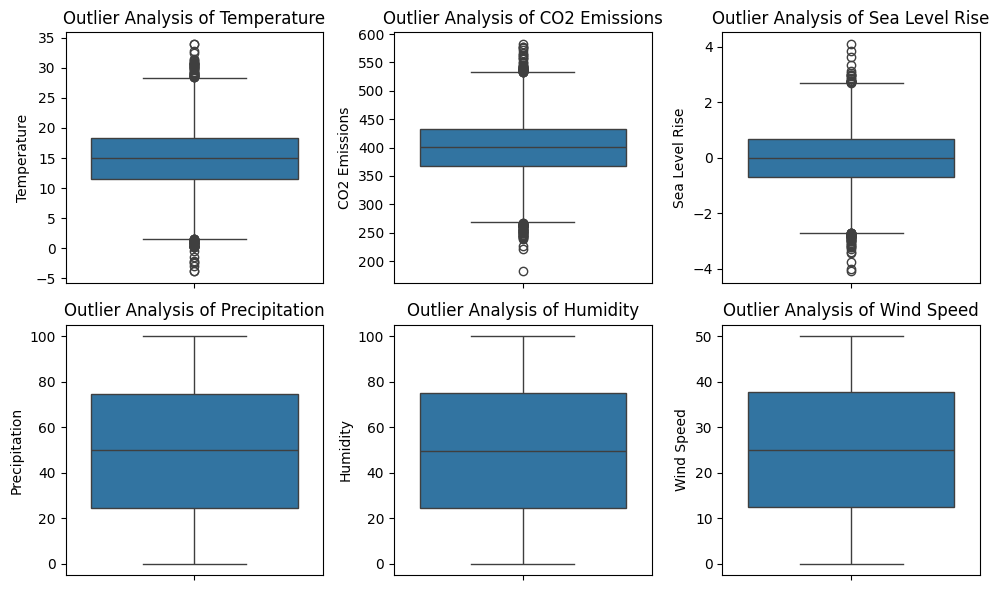

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to check for outliers
columns_to_check = ["Temperature", "CO2 Emissions", "Sea Level Rise", "Precipitation", "Humidity", "Wind Speed"]

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Loop through each column and create a box plot
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)  # Adjust the subplot grid (2 rows, 3 columns)
    sns.boxplot(y=df[column])
    plt.title(f'Outlier Analysis of {column}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


#**REMOVING THE OUTLIERS**

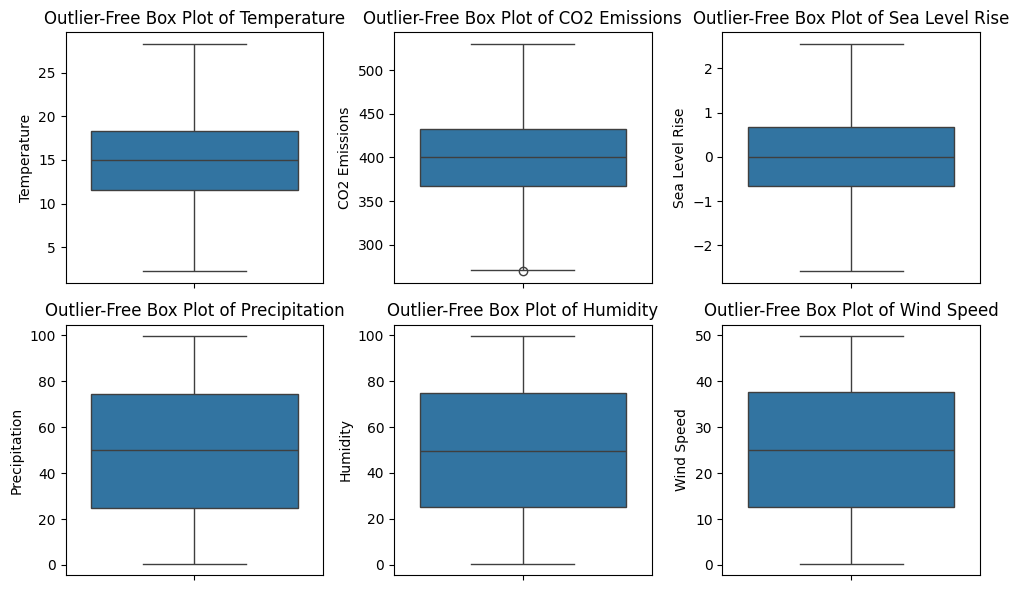

In [9]:
# List of columns to check for outliers
columns_to_check = ["Temperature", "CO2 Emissions", "Sea Level Rise", "Precipitation", "Humidity", "Wind Speed"]

# Function to remove outliers using the IQR method
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to remove outliers from the DataFrame
df = remove_outliers(df, columns_to_check)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Loop through each column and create a box plot for the cleaned data
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)  # Adjust the subplot grid (2 rows, 3 columns)
    sns.boxplot(y=df[column])
    plt.title(f'Outlier-Free Box Plot of {column}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


#**TIME SERISE RELATIONSHIP**

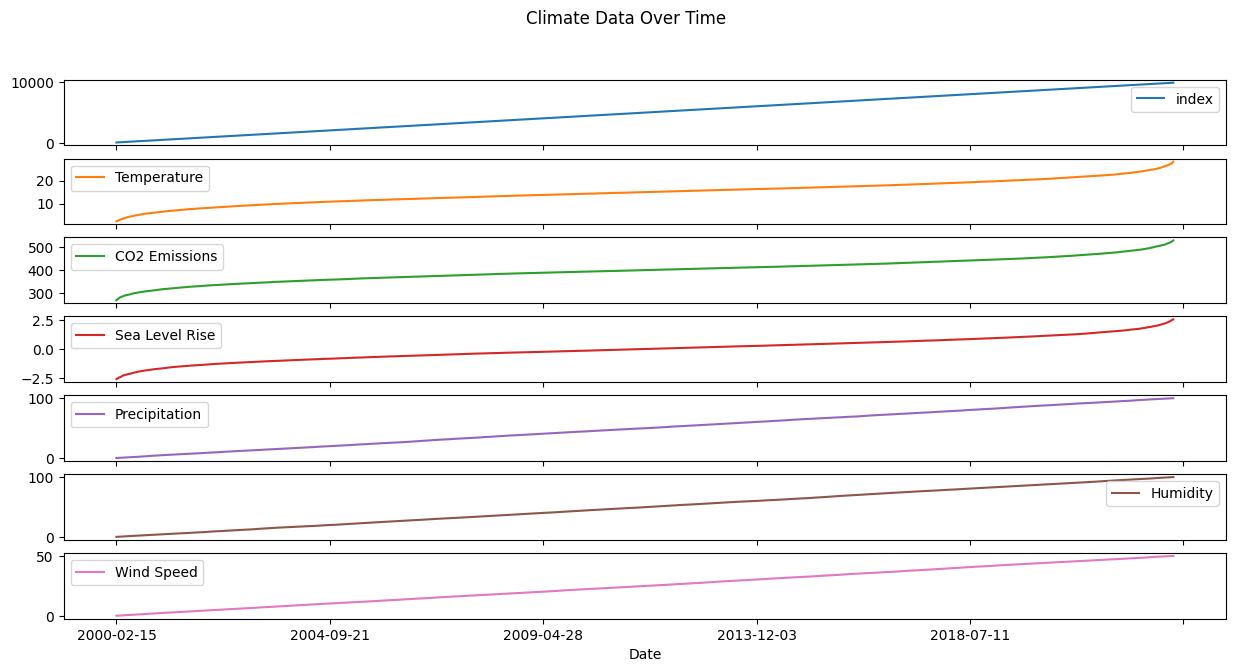

In [10]:
# Reset the index to make 'Date' a column again
df = df.reset_index()

# Setting 'Date' column as the index
df.set_index('Date', inplace=True)

# Plotting
gr = df.plot(figsize=(15, 7), subplots=True, title='Climate Data Over Time')

# Adjusting legend size for each subplot
for ax in gr:
    legend = ax.legend()
    if legend:
        legend.prop.set_size(14)
    plt.show()

In [ ]:
df

,index,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
Date,,,,,,,
2000-02-15,54,2.263400,269.431996,-2.583831,0.500851,0.463453,0.259097
2000-02-16,55,2.282272,270.637744,-2.569103,0.508246,0.465128,0.264789
2000-02-17,56,2.286275,270.902195,-2.565297,0.546088,0.475953,0.275347
2000-02-17,57,2.318023,271.183771,-2.561535,0.546522,0.478991,0.277389
2000-02-18,58,2.323526,271.689742,-2.553771,0.554189,0.492939,0.279569
...,...,...,...,...,...,...,...
2022-11-24,9955,28.104269,529.386693,2.550681,99.612739,99.552094,49.786653
2022-11-24,9956,28.169891,529.836649,2.553176,99.629081,99.553650,49.791675
2022-11-25,9957,28.265915,529.911314,2.554735,99.642262,99.554856,49.798066


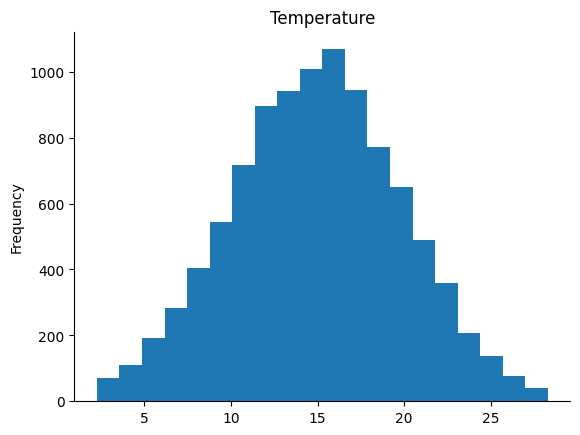

In [ ]:
# @title Temperature

from matplotlib import pyplot as plt
df['Temperature'].plot(kind='hist', bins=20, title='Temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

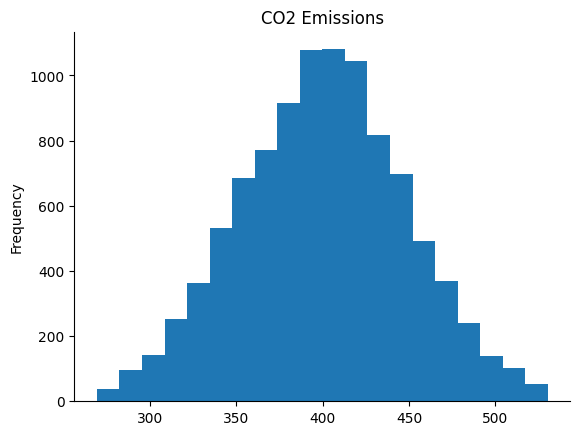

In [ ]:
# @title CO2 Emissions

from matplotlib import pyplot as plt
df['CO2 Emissions'].plot(kind='hist', bins=20, title='CO2 Emissions')
plt.gca().spines[['top', 'right',]].set_visible(False)

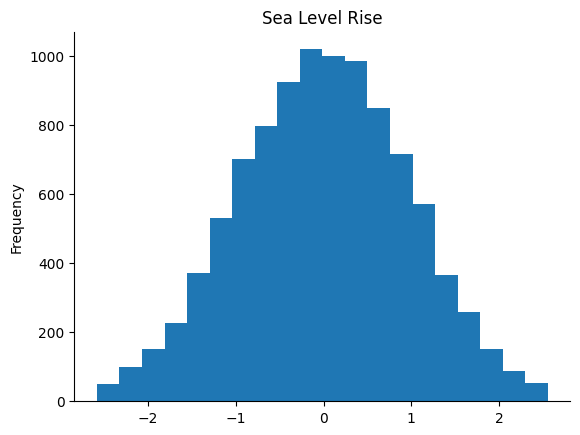

In [ ]:
# @title Sea Level Rise

from matplotlib import pyplot as plt
df['Sea Level Rise'].plot(kind='hist', bins=20, title='Sea Level Rise')
plt.gca().spines[['top', 'right',]].set_visible(False)

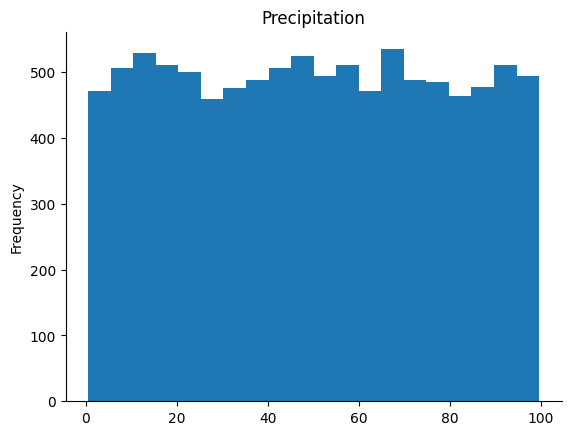

In [ ]:
# @title Precipitation

from matplotlib import pyplot as plt
df['Precipitation'].plot(kind='hist', bins=20, title='Precipitation')
plt.gca().spines[['top', 'right',]].set_visible(False)

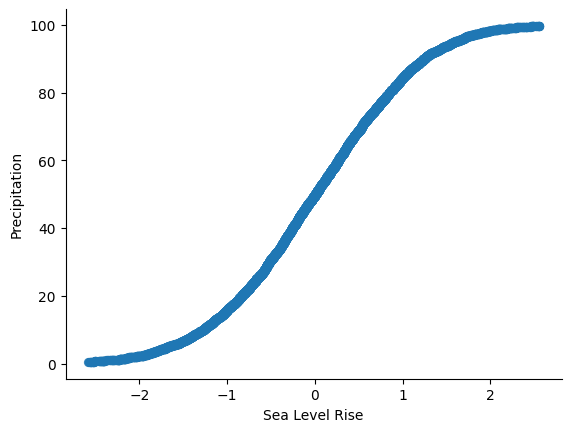

In [ ]:
# @title Sea Level Rise vs Precipitation

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Sea Level Rise', y='Precipitation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

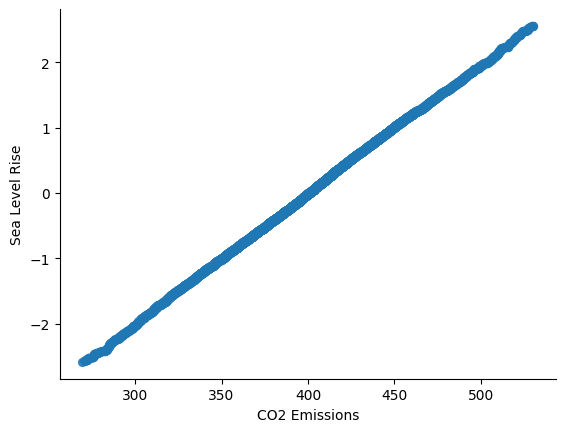

In [ ]:
# @title CO2 Emissions vs Sea Level Rise

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='CO2 Emissions', y='Sea Level Rise', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

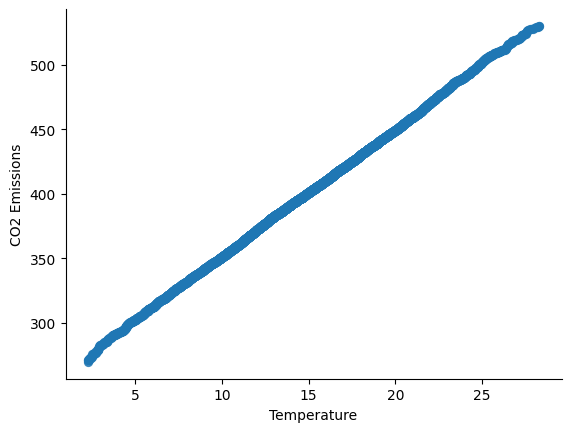

In [ ]:
# @title Temperature vs CO2 Emissions

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Temperature', y='CO2 Emissions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

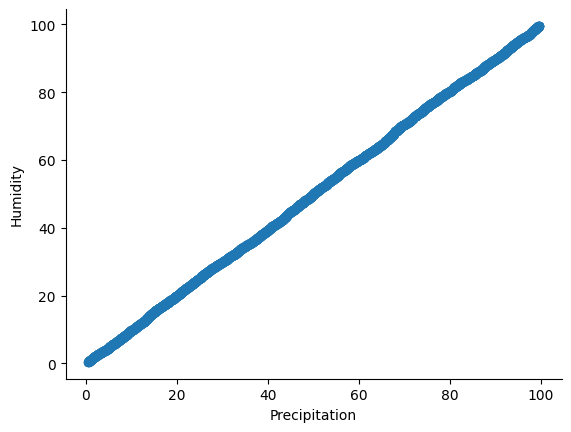

In [ ]:
# @title Precipitation vs Humidity

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Precipitation', y='Humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#**CORRELATION MATRIX**

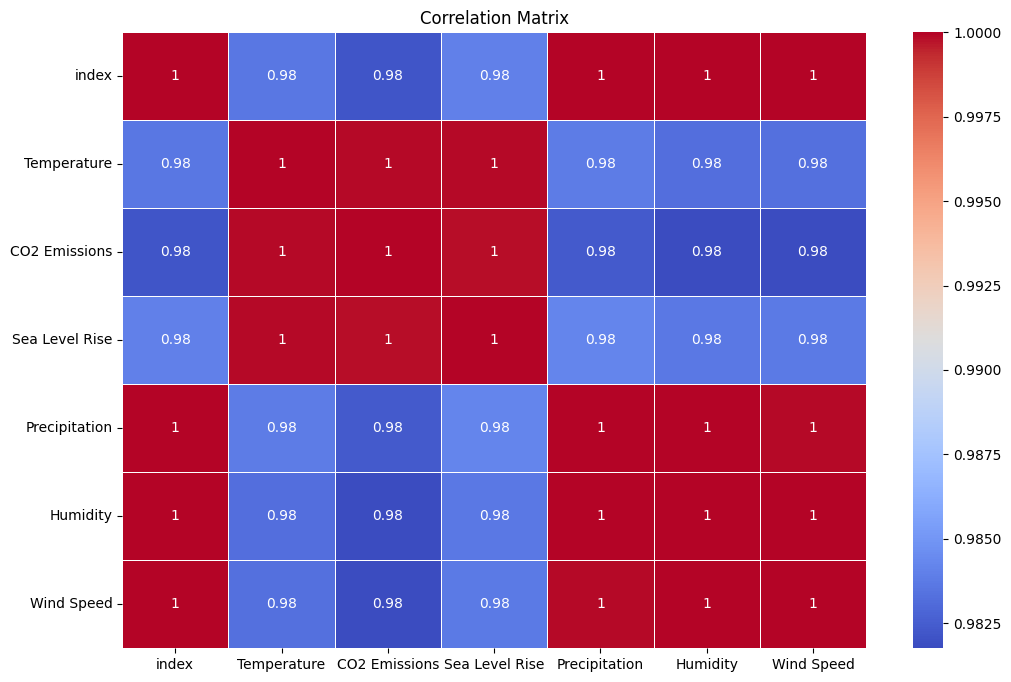

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#**SELECTING FEATURES AND TARGET COLUMN**

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your dataframe
# Define the features and target variable if you have a target column
# For instance, if 'confidence' is your target variable:
X = df['Temperature']
Y = df[['CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']]

In [12]:
X

Date
2000-02-15     2.263400
2000-02-16     2.282272
2000-02-17     2.286275
2000-02-17     2.318023
2000-02-18     2.323526
                ...    
2022-11-24    28.104269
2022-11-24    28.169891
2022-11-25    28.265915
2022-11-26    28.293390
2022-11-27    28.296467
Name: Temperature, Length: 9906, dtype: float64

In [13]:
Y

,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
Date,,,,,
2000-02-15,269.431996,-2.583831,0.500851,0.463453,0.259097
2000-02-16,270.637744,-2.569103,0.508246,0.465128,0.264789
2000-02-17,270.902195,-2.565297,0.546088,0.475953,0.275347
2000-02-17,271.183771,-2.561535,0.546522,0.478991,0.277389
2000-02-18,271.689742,-2.553771,0.554189,0.492939,0.279569
...,...,...,...,...,...
2022-11-24,529.386693,2.550681,99.612739,99.552094,49.786653
2022-11-24,529.836649,2.553176,99.629081,99.553650,49.791675
2022-11-25,529.911314,2.554735,99.642262,99.554856,49.798066


#**SPLITING THE DATASET INTO TRAINING AND TESTING**

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# If you do not have a target variable and want to split the whole dataframe
# df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (7924,)
X_test shape: (1982,)
y_train shape: (7924, 5)
y_test shape: (1982, 5)


#**APPLYING ALGORITHMS ON THE DATASET**

##APPLYING RNN

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import SimpleRNN, Dense, Input
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with datetime index
df = df.sort_index()

# Extract features (X) and target (y)
X = df['Temperature'].values.reshape(-1, 1)  # 2D array
y = df[['CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']].values

# Normalize the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# Reshape input to be 3D [samples, timesteps, features] for RNN
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the RNN model
inputs = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
rnn_out = SimpleRNN(50, activation='relu')(inputs)  # changed from LSTM to SimpleRNN
output = Dense(y_train.shape[1])(rnn_out)

model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(
    X_train_reshaped,
    y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test_reshaped, y_test),
    verbose=2,
    shuffle=False
)
model.save("models/rnn_model.h5", save_format='tf')


Epoch 1/20
124/124 - 2s - 14ms/step - loss: 0.1009 - val_loss: 0.0225
Epoch 2/20
124/124 - 0s - 2ms/step - loss: 0.0191 - val_loss: 0.0164
Epoch 3/20
124/124 - 0s - 2ms/step - loss: 0.0135 - val_loss: 0.0108
Epoch 4/20
124/124 - 0s - 2ms/step - loss: 0.0083 - val_loss: 0.0061
Epoch 5/20
124/124 - 0s - 2ms/step - loss: 0.0045 - val_loss: 0.0032
Epoch 6/20
124/124 - 0s - 2ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 7/20
124/124 - 0s - 2ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 8/20
124/124 - 0s - 2ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 9/20
124/124 - 0s - 2ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/20
124/124 - 0s - 2ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 11/20
124/124 - 0s - 2ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 12/20
124/124 - 0s - 2ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 13/20
124/124 - 0s - 2ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 14/20
124/124 - 0s - 2ms/step - loss: 0.0010 - val_loss: 9.9185e-04
Epoch 15/20
124/124 - 0s

##EVALUATION METRICES(RNN)


In [20]:
# -----------------------
# Evaluate the RNN model
# -----------------------

# Evaluate loss on test set (MSE in scaled form)
test_loss = model.evaluate(X_test_reshaped, y_test, verbose=0)

# Make predictions on test set
y_pred = model.predict(X_test_reshaped)

# Inverse transform back to original scale
y_test_inverse = scaler_y.inverse_transform(y_test)
y_pred_inverse = scaler_y.inverse_transform(y_pred)

# Calculate evaluation metrics on original scale
r2 = r2_score(y_test_inverse, y_pred_inverse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse = mean_squared_error(y_test_inverse, y_pred_inverse)

# Nash-Sutcliffe Efficiency
nse = 1 - (
    np.sum((y_test_inverse - y_pred_inverse) ** 2) /
    np.sum((y_test_inverse - np.mean(y_test_inverse, axis=0)) ** 2)
)

print(f"Test Loss (scaled MSE): {test_loss:.4f}")
print(f"R-squared value on test set: {r2:.4f}")
print(f"Mean Absolute Error on test set: {mae:.4f}")
print(f"Mean Squared Error on test set: {mse:.4f}")
print(f"Nash-Sutcliffe Efficiency on test set: {nse:.4f}")


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Loss (scaled MSE): 0.0011
R-squared value on test set: 0.9872
Mean Absolute Error on test set: 1.5744
Mean Squared Error on test set: 8.3606
Nash-Sutcliffe Efficiency on test set: 0.9902


##TRAINING AND TESTING PERFORMANCE(RNN)

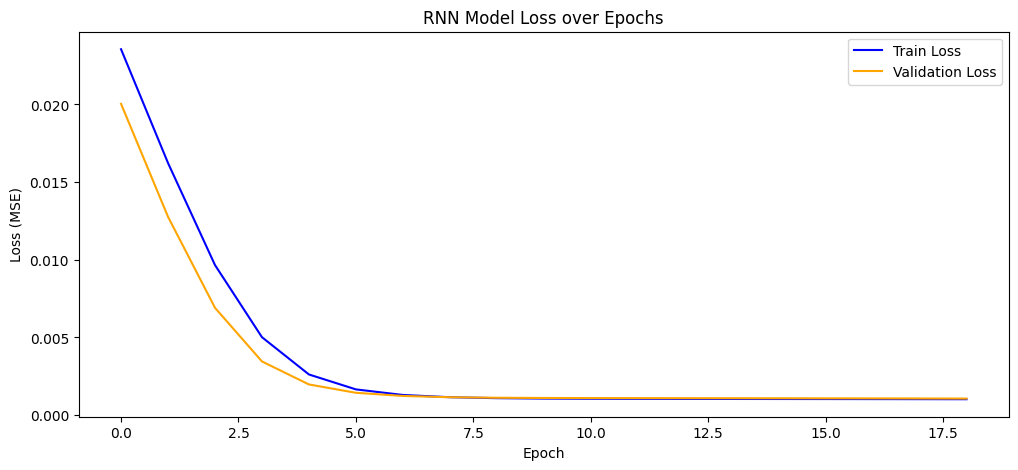

In [21]:
# -----------------------------
# Plot Training and Validation Loss
# (skip the first epoch)
# -----------------------------
plt.figure(figsize=(12, 5))

# history.history is a dict: keys = ['loss', 'val_loss']
plt.plot(history.history['loss'][1:], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'][1:], label='Validation Loss', color='orange')

plt.title('RNN Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()



##MODEL EVALUATION GRAPH(RNN)

R-squared value for CO2 Emissions: 0.9985
R-squared value for Sea Level Rise: 0.9990
R-squared value for Precipitation: 0.9803
R-squared value for Humidity: 0.9791
R-squared value for Wind Speed: 0.9792


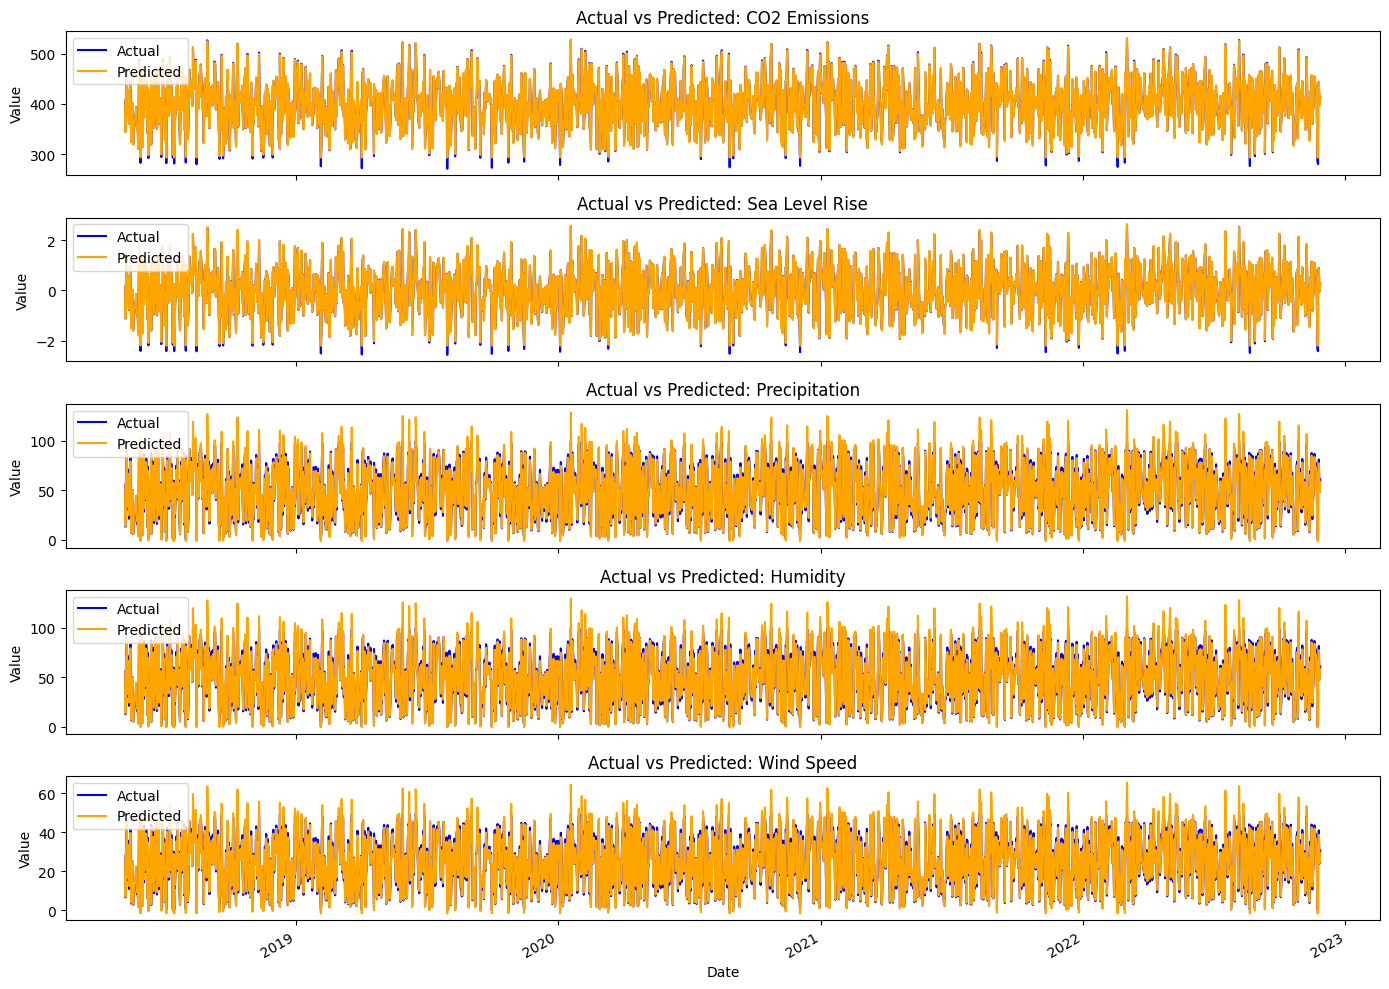

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import matplotlib.dates as mdates

# ----------------------------
# Assumptions:
# df: DataFrame with a datetime index
# X_train, X_test: training and testing input arrays
# y_test_inverse, y_pred_inverse: true and predicted outputs (inverse-transformed)
# ----------------------------

# Get the test dates from the original dataframe index
dates_test = df.index[X_train.shape[0]:X_train.shape[0] + X_test.shape[0]]

# Convert to datetime series
dates_test_series = pd.to_datetime(dates_test)

# Filter between years 2000 and 2022
mask = (dates_test_series.year >= 2000) & (dates_test_series.year <= 2022)
filtered_dates_test = dates_test_series[mask]

# Feature names for outputs
feature_names = ['CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']

# Ensure y_test_inverse and y_pred_inverse match the filtered dates
y_test_filtered = y_test_inverse[mask]
y_pred_filtered = y_pred_inverse[mask]

# Number of output features
n_features = y_test_filtered.shape[1]

# Initialize figure
plt.figure(figsize=(14, 10))

# Loop over each feature
for i in range(n_features):
    # Create DataFrame for easier handling
    df_plot = pd.DataFrame({
        'Date': filtered_dates_test,
        'Actual': y_test_filtered[:, i],
        'Predicted': y_pred_filtered[:, i]
    })

    # Calculate R² for each feature
    r2 = r2_score(df_plot['Actual'], df_plot['Predicted'])
    print(f'R-squared value for {feature_names[i]}: {r2:.4f}')

    # Subplot for each feature
    plt.subplot(n_features, 1, i + 1)
    plt.plot(df_plot['Date'], df_plot['Actual'], label='Actual', color='blue')
    plt.plot(df_plot['Date'], df_plot['Predicted'], label='Predicted', color='orange')
    plt.title(f'Actual vs Predicted: {feature_names[i]}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()

    # Format the x-axis for yearly ticks
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gcf().autofmt_xdate()  # Rotate dates automatically

plt.tight_layout()
plt.show()


## APPLYING LSTM


In [17]:


import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with datetime index
df = df.sort_index()

# Extract features (X) and target (y)
# Make sure X is 2D, reshape if necessary
X = df['Temperature'].values.reshape(-1, 1)  # Reshape to 2D array
y = df[['CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']].values

# Normalize the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape input to be 3D [samples, timesteps, features] for LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
inputs = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
lstm_out = LSTM(50, activation='relu')(inputs)
output = Dense(y_train.shape[1])(lstm_out)

model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=64, validation_data=(X_test_reshaped, y_test), verbose=2, shuffle=False)
model.save("models/lstm_model.h5", save_format='tf')

Epoch 1/20
124/124 - 2s - 15ms/step - loss: 0.1904 - val_loss: 0.0665
Epoch 2/20
124/124 - 0s - 3ms/step - loss: 0.0372 - val_loss: 0.0286
Epoch 3/20
124/124 - 0s - 3ms/step - loss: 0.0244 - val_loss: 0.0204
Epoch 4/20
124/124 - 0s - 3ms/step - loss: 0.0159 - val_loss: 0.0120
Epoch 5/20
124/124 - 0s - 3ms/step - loss: 0.0086 - val_loss: 0.0061
Epoch 6/20
124/124 - 0s - 3ms/step - loss: 0.0045 - val_loss: 0.0035
Epoch 7/20
124/124 - 0s - 3ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 8/20
124/124 - 0s - 3ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 9/20
124/124 - 0s - 3ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 10/20
124/124 - 0s - 2ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 11/20
124/124 - 0s - 2ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 12/20
124/124 - 0s - 2ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 13/20
124/124 - 0s - 3ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 14/20
124/124 - 0s - 3ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 15/20
124/124 - 0s - 2

##EVALUATION METRICES(LSTM)

In [ ]:

# Evaluate the model
mse = model.evaluate(X_test_reshaped, y_test, verbose=0)

# Make predictions
y_pred = model.predict(X_test_reshaped)

# Inverse transform to get the original scale
y_test_inverse = scaler_y.inverse_transform(y_test)
y_pred_inverse = scaler_y.inverse_transform(y_pred)

# Calculate evaluation metrics
r2 = r2_score(y_test_inverse, y_pred_inverse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
nse = 1 - (np.sum((y_test_inverse - y_pred_inverse)**2) / np.sum((y_test_inverse - np.mean(y_test_inverse))**2))

print(f'R-squared value on test set: {r2}')
print(f'Mean Absolute Error on test set: {mae}')
print(f'Mean Squared Error on test set: {mse}')
print(f'Nash-Sutcliffe Efficiency on test set: {nse}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
R-squared value on test set: 0.9695098771161247
Mean Absolute Error on test set: 2.5802907099187182
Mean Squared Error on test set: 21.15511376565746
Nash-Sutcliffe Efficiency on test set: 0.9990758098664922


##TRAINING AND TESTING PERFORMANCE(LSTM)

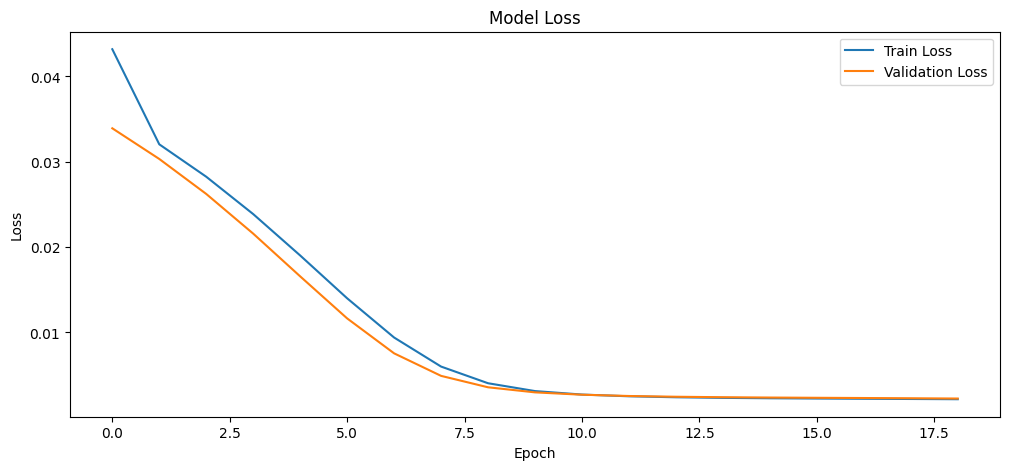

In [ ]:

# Plot training and validation loss values, skipping the first epoch
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'][1:], label='Train Loss')
plt.plot(history.history['val_loss'][1:], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##MODEL EVALUATION GRAPH(LSTM)

R-squared value for CO2 Emissions: 0.9903441578222008
R-squared value for Sea Level Rise: 0.9881561175235402
R-squared value for Precipitation: 0.9566000217193802
R-squared value for Humidity: 0.9563376336346703
R-squared value for Wind Speed: 0.9561114548808314


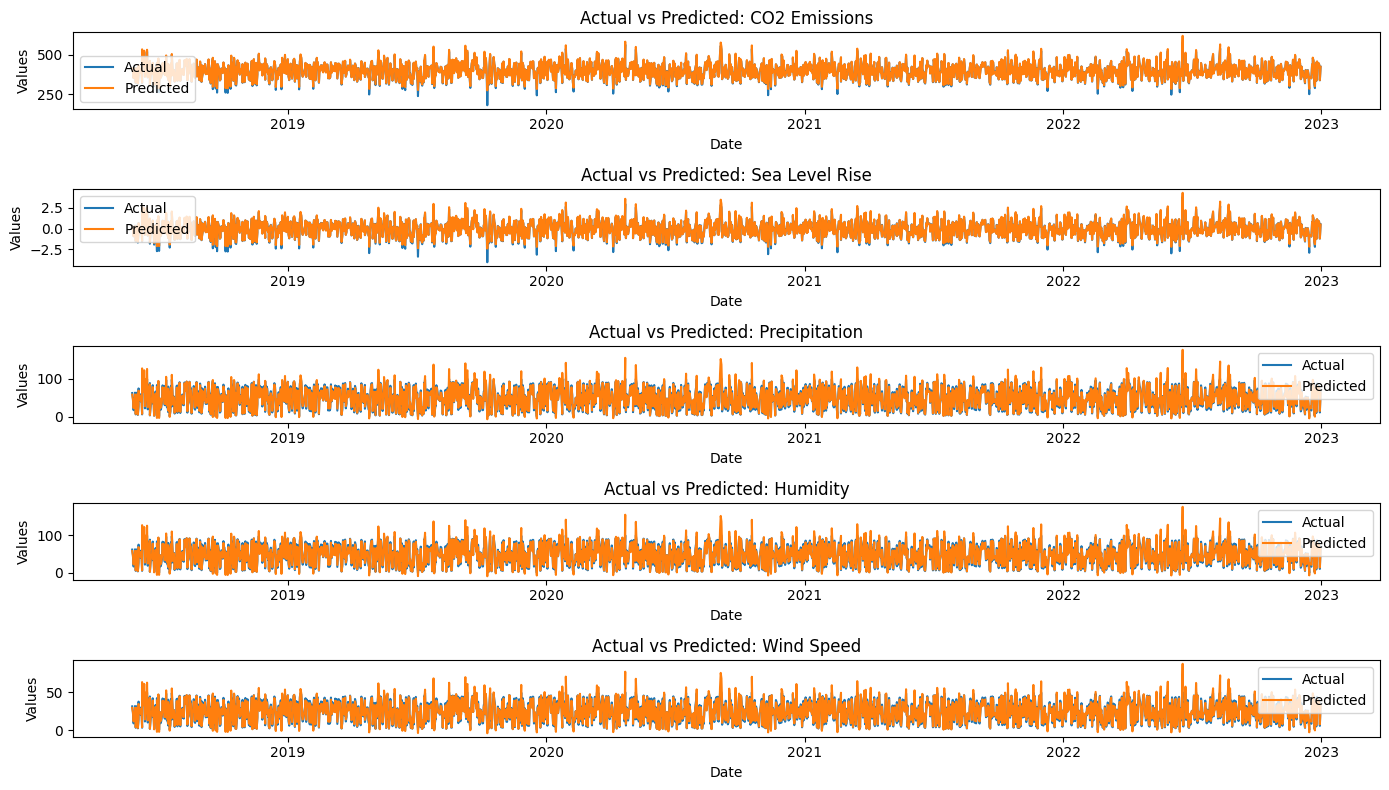

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import matplotlib.dates as mdates

# Assuming df has a datetime index and X_train, X_test, y_test_inverse, and y_pred_inverse are defined
# Assuming df has a datetime index and X_train, X_test, y_test_inverse, and y_pred_inverse are defined
dates_test = df.index[X_train.shape[0]:X_train.shape[0] + X_test.shape[0]]

# Convert dates_test to a datetime series
dates_test_series = pd.to_datetime(dates_test)

# Filter for dates between 2000 and 2022
filtered_dates_test = dates_test_series[(dates_test_series.year >= 2000) & (dates_test_series.year <= 2022)]

# Feature names for the corresponding outputs
feature_names = ['CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']

# Number of features
n_features = y_test_inverse.shape[1]

# Initialize the plot
plt.figure(figsize=(14, 8))

# Plotting actual vs predicted values for each feature
for i in range(n_features):
  # Combine dates, y_test, and y_pred into a DataFrame for easy handling
  df_plot = pd.DataFrame({
      'Date': filtered_dates_test,
      'Actual': y_test_inverse[:, i],
      'Predicted': y_pred_inverse[:, i]
  })

  # Calculate R-squared value
  r2 = r2_score(df_plot['Actual'], df_plot['Predicted'])
  print(f'R-squared value for {feature_names[i]}: {r2}')

  # Plot actual vs predicted values
  plt.subplot(n_features, 1, i + 1)
  plt.plot(df_plot['Date'], df_plot['Actual'], label='Actual')
  plt.plot(df_plot['Date'], df_plot['Predicted'], label='Predicted')
  plt.title(f'Actual vs Predicted: {feature_names[i]}')
  plt.xlabel('Date')
  plt.ylabel('Values')
  plt.legend()

  # Formatting the x-axis for dates
  plt.gca().xaxis.set_major_locator(mdates.YearLocator())
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


##APPLYING GRU

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GRU, Dense, Input
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with datetime index
df = df.sort_index()

# Normalize the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape input to be 3D [samples, timesteps, features] for GRU
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the GRU model
inputs = Input(shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))
gru_out = GRU(50, activation='relu')(inputs)
output = Dense(y_train.shape[1])(gru_out)

model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=64, validation_data=(X_test_reshaped, y_test), verbose=2, shuffle=False)
model.save("models/gru_model.h5", save_format='tf')

Epoch 1/20
124/124 - 2s - 19ms/step - loss: 0.1185 - val_loss: 0.0321
Epoch 2/20
124/124 - 0s - 3ms/step - loss: 0.0278 - val_loss: 0.0233
Epoch 3/20
124/124 - 0s - 3ms/step - loss: 0.0176 - val_loss: 0.0119
Epoch 4/20
124/124 - 0s - 3ms/step - loss: 0.0074 - val_loss: 0.0041
Epoch 5/20
124/124 - 0s - 3ms/step - loss: 0.0027 - val_loss: 0.0019
Epoch 6/20
124/124 - 0s - 3ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 7/20
124/124 - 0s - 3ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/20
124/124 - 0s - 3ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/20
124/124 - 0s - 3ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 10/20
124/124 - 0s - 3ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 11/20
124/124 - 0s - 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 12/20
124/124 - 0s - 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 13/20
124/124 - 0s - 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 14/20
124/124 - 0s - 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 15/20
124/124 - 0s - 3

##EVALUATION METRICES(GRU)

In [ ]:
# Evaluate the model
mse = model.evaluate(X_test_reshaped, y_test, verbose=0)

# Make predictions
y_pred = model.predict(X_test_reshaped)

# Inverse transform to get the original scale
y_test_inverse = scaler_y.inverse_transform(y_test)
y_pred_inverse = scaler_y.inverse_transform(y_pred)

# Calculate evaluation metrics
r2 = r2_score(y_test_inverse, y_pred_inverse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
nse = 1 - (np.sum((y_test_inverse - y_pred_inverse)**2) / np.sum((y_test_inverse - np.mean(y_test_inverse))**2))

print(f'R-squared value on test set: {r2}')
print(f'Mean Absolute Error on test set: {mae}')
print(f'Mean Squared Error on test set: {mse}')
print(f'Nash-Sutcliffe Efficiency on test set: {nse}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
R-squared value on test set: 0.9784640996563834
Mean Absolute Error on test set: 2.003814218719206
Mean Squared Error on test set: 13.811831242088056
Nash-Sutcliffe Efficiency on test set: 0.9993966112259659


##TRAINING AND TESTING PERFORMANCE(GRU)

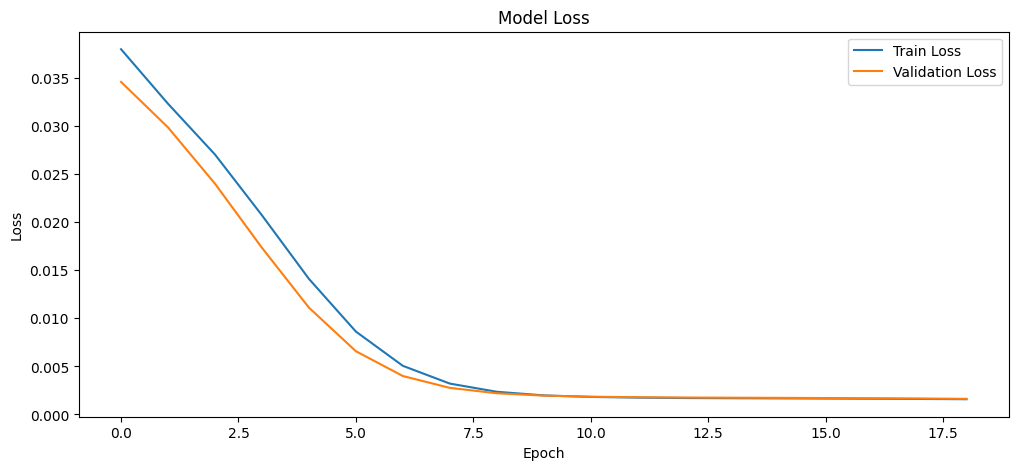

In [ ]:

# Plot training and validation loss values
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'][1:], label='Train Loss')
plt.plot(history.history['val_loss'][1:], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##MODEL EVALUATION GRAPH(GRU)

R-squared value for CO2 Emissions: 0.9959407399470636
R-squared value for Sea Level Rise: 0.9915242824689923
R-squared value for Precipitation: 0.9686073158583739
R-squared value for Humidity: 0.9687924816618405
R-squared value for Wind Speed: 0.9674556783456468


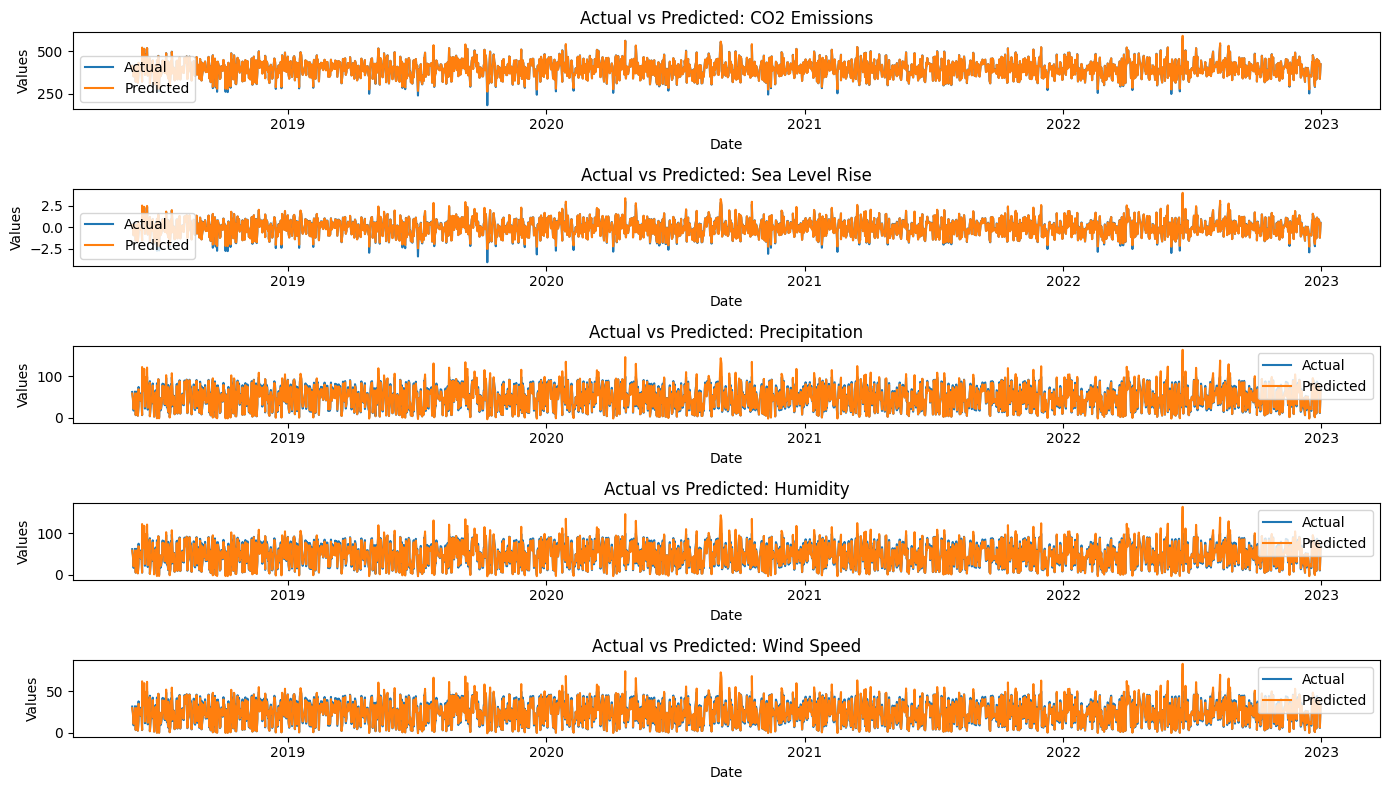

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import matplotlib.dates as mdates

# Assuming df has a datetime index and X_train, X_test, y_test_inverse, and y_pred_inverse are defined
# Assuming df has a datetime index and X_train, X_test, y_test_inverse, and y_pred_inverse are defined
dates_test = df.index[X_train.shape[0]:X_train.shape[0] + X_test.shape[0]]

# Convert dates_test to a datetime series
dates_test_series = pd.to_datetime(dates_test)

# Feature names for the corresponding outputs
feature_names = ['CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']

# Number of features
n_features = y_test_inverse.shape[1]

# Initialize the plot
plt.figure(figsize=(14, 8))

# Plotting actual vs predicted values for each feature
for i in range(n_features):
    # Combine dates, y_test, and y_pred into a DataFrame for easy handling
    df_plot = pd.DataFrame({
        'Date': dates_test_series,
        'Actual': y_test_inverse[:, i],
        'Predicted': y_pred_inverse[:, i]
    })

    # Calculate R-squared value
    r2 = r2_score(df_plot['Actual'], df_plot['Predicted'])
    print(f'R-squared value for {feature_names[i]}: {r2}')

    # Plot actual vs predicted values
    plt.subplot(n_features, 1, i + 1)
    plt.plot(df_plot['Date'], df_plot['Actual'], label='Actual')
    plt.plot(df_plot['Date'], df_plot['Predicted'], label='Predicted')
    plt.title(f'Actual vs Predicted: {feature_names[i]}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()

    # Formatting the x-axis for dates
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

## APPLYING ANN

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with datetime index
df = df.sort_index()

# Normalize the features and target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Define the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1]))

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=2, shuffle=False)
model.save("models/ann_model.h5", save_format='tf')

Epoch 1/20


c:\Users\Raj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


124/124 - 1s - 10ms/step - loss: 0.1072 - val_loss: 0.0062
Epoch 2/20
124/124 - 0s - 2ms/step - loss: 0.0016 - val_loss: 4.5473e-04
Epoch 3/20
124/124 - 0s - 2ms/step - loss: 3.5463e-04 - val_loss: 3.3188e-04
Epoch 4/20
124/124 - 0s - 2ms/step - loss: 2.8805e-04 - val_loss: 2.9072e-04
Epoch 5/20
124/124 - 0s - 2ms/step - loss: 2.5341e-04 - val_loss: 2.5905e-04
Epoch 6/20
124/124 - 0s - 2ms/step - loss: 2.2426e-04 - val_loss: 2.3272e-04
Epoch 7/20
124/124 - 0s - 2ms/step - loss: 1.9944e-04 - val_loss: 2.0883e-04
Epoch 8/20
124/124 - 0s - 2ms/step - loss: 1.7726e-04 - val_loss: 1.8624e-04
Epoch 9/20
124/124 - 0s - 2ms/step - loss: 1.5684e-04 - val_loss: 1.6442e-04
Epoch 10/20
124/124 - 0s - 2ms/step - loss: 1.3735e-04 - val_loss: 1.4325e-04
Epoch 11/20
124/124 - 0s - 2ms/step - loss: 1.1985e-04 - val_loss: 1.2444e-04
Epoch 12/20
124/124 - 0s - 2ms/step - loss: 1.0466e-04 - val_loss: 1.0825e-04
Epoch 13/20
124/124 - 0s - 2ms/step - loss: 9.1597e-05 - val_loss: 9.5048e-05
Epoch 14/20
124/1

##EVALUATION METRICES(ANN)

In [ ]:
# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform to get the original scale
y_test_inverse = scaler_y.inverse_transform(y_test)
y_pred_inverse = scaler_y.inverse_transform(y_pred)

# Calculate evaluation metrics
r2 = r2_score(y_test_inverse, y_pred_inverse)
mae = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
nse = 1 - (np.sum((y_test_inverse - y_pred_inverse)**2) / np.sum((y_test_inverse - np.mean(y_test_inverse))**2))

print(f'R-squared value on test set: {r2}')
print(f'Mean Absolute Error on test set: {mae}')
print(f'Mean Squared Error on test set: {mse}')
print(f'Nash-Sutcliffe Efficiency on test set: {nse}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
R-squared value on test set: 0.9982732617500322
Mean Absolute Error on test set: 0.5152824485331935
Mean Squared Error on test set: 1.6460832709658768
Nash-Sutcliffe Efficiency on test set: 0.9999280885966954


##TRAINING AND TESTING PERFORMANCE(ANN)

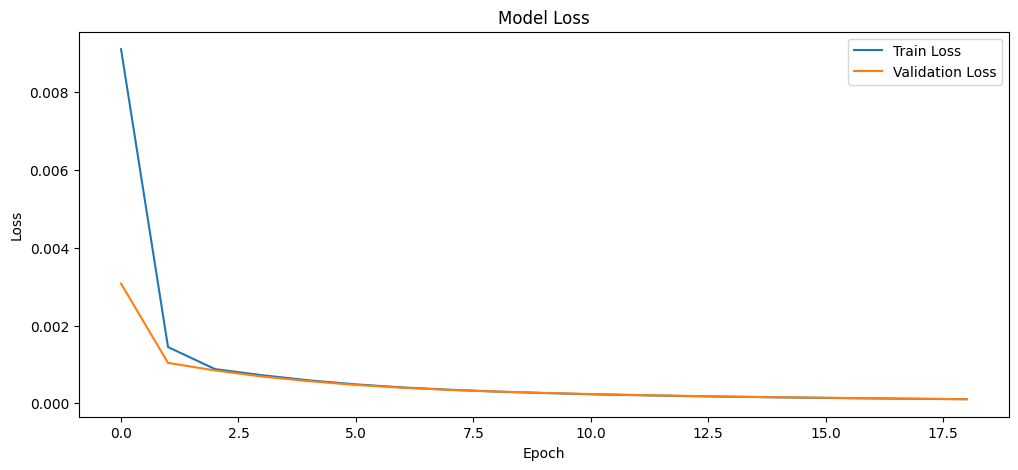

In [ ]:
# Plot training and validation loss values
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'][1:], label='Train Loss')
plt.plot(history.history['val_loss'][1:], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##MODEL EVALUATION GRAPH(ANN)

R-squared value for CO2 Emissions: 0.9982255920084453
R-squared value for Sea Level Rise: 0.999027882419034
R-squared value for Precipitation: 0.9975551118613982
R-squared value for Humidity: 0.9983243341649972
R-squared value for Wind Speed: 0.9982333882962866


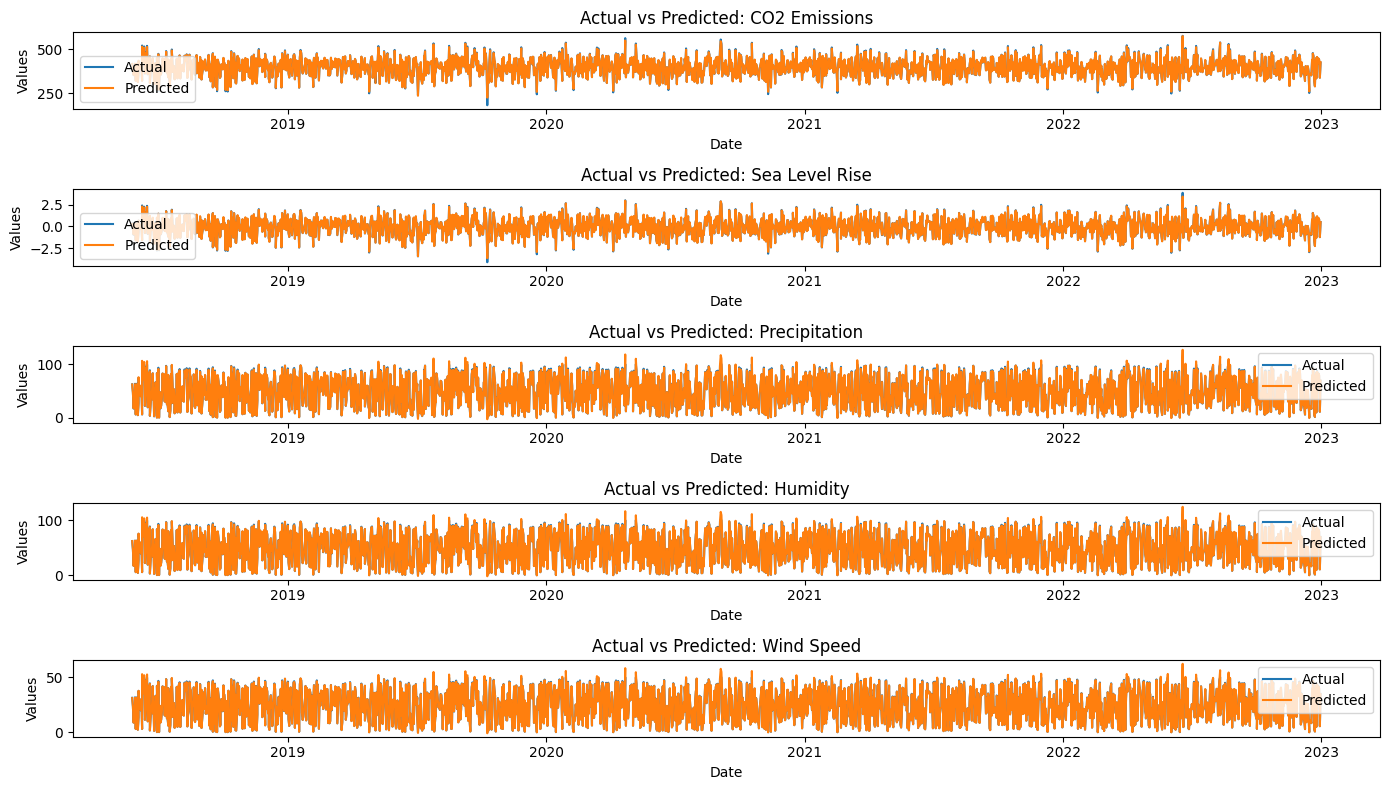

In [ ]:
# Plotting actual vs predicted values
dates_test = df.index[-len(X_test):]

# Convert dates_test to a datetime series
dates_test_series = pd.to_datetime(dates_test)

# Feature names for the corresponding outputs
feature_names = ['CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']

# Number of features
n_features = y_test_inverse.shape[1]

# Initialize the plot
plt.figure(figsize=(14, 8))

# Plotting actual vs predicted values for each feature
for i in range(n_features):
    # Combine dates, y_test, and y_pred into a DataFrame for easy handling
    df_plot = pd.DataFrame({
        'Date': dates_test_series,
        'Actual': y_test_inverse[:, i],
        'Predicted': y_pred_inverse[:, i]
    })

    # Calculate R-squared value
    r2 = r2_score(df_plot['Actual'], df_plot['Predicted'])
    print(f'R-squared value for {feature_names[i]}: {r2}')

    # Plot actual vs predicted values
    plt.subplot(n_features, 1, i + 1)
    plt.plot(df_plot['Date'], df_plot['Actual'], label='Actual')
    plt.plot(df_plot['Date'], df_plot['Predicted'], label='Predicted')
    plt.title(f'Actual vs Predicted: {feature_names[i]}')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.legend()

    # Formatting the x-axis for dates
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()


## APPLYING LINEAR REGRESSION

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.dates as mdates
import joblib
# ----------------------------
# 1. Data preparation
# ----------------------------
# Assuming df is your DataFrame with datetime index
df = df.sort_index()

# Feature (X) and Target (y)
X = df['Temperature'].values.reshape(-1, 1)
y = df[['CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']].values

# Normalize features & target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

# ----------------------------
# 2. Linear Regression Model (multi-output)
# ----------------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred = lr_model.predict(X_test)

# Inverse transform to original scale
y_test_inverse = scaler_y.inverse_transform(y_test)
y_pred_inverse = scaler_y.inverse_transform(y_pred)


joblib.dump(lr_model, "models/linear_regression.pkl")
joblib.dump(scaler_X, "models/scaler_X.pkl")
joblib.dump(scaler_y, "models/scaler_y.pkl")

['models/scaler_y.pkl']

##EVALUATION METRICES(LR)

In [ ]:

r2_overall = r2_score(y_test_inverse, y_pred_inverse)
mae_overall = mean_absolute_error(y_test_inverse, y_pred_inverse)
mse_overall = mean_squared_error(y_test_inverse, y_pred_inverse)
nse_overall = 1 - (np.sum((y_test_inverse - y_pred_inverse) ** 2) /
                   np.sum((y_test_inverse - np.mean(y_test_inverse, axis=0)) ** 2))

print("Overall R²:", r2_overall)
print("Overall MAE:", mae_overall)
print("Overall MSE:", mse_overall)
print("Overall NSE:", nse_overall)


Overall R²: 0.9690478092120086
Overall MAE: 2.52261420709988
Overall MSE: 19.470697355317515
Overall NSE: 0.9777346298604621


In [ ]:
# ----------------------------
feature_names = ['CO2 Emissions', 'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed']
for i, feature in enumerate(feature_names):
    r2 = r2_score(y_test_inverse[:, i], y_pred_inverse[:, i])
    mae = mean_absolute_error(y_test_inverse[:, i], y_pred_inverse[:, i])
    mse = mean_squared_error(y_test_inverse[:, i], y_pred_inverse[:, i])
    nse = 1 - (np.sum((y_test_inverse[:, i] - y_pred_inverse[:, i]) ** 2) /
               np.sum((y_test_inverse[:, i] - np.mean(y_test_inverse[:, i])) ** 2))
    print(f"\nFeature: {feature}")
    print(f"R²: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"NSE: {nse:.4f}")


Feature: CO2 Emissions
R²: 0.9994
MAE: 0.6487
MSE: 1.5222
NSE: 0.9994

Feature: Sea Level Rise
R²: 0.9995
MAE: 0.0109
MSE: 0.0005
NSE: 0.9995

Feature: Precipitation
R²: 0.9495
MAE: 4.7154
MSE: 41.9585
NSE: 0.9495

Feature: Humidity
R²: 0.9483
MAE: 4.8255
MSE: 43.1203
NSE: 0.9483

Feature: Wind Speed
R²: 0.9485
MAE: 2.4125
MSE: 10.7519
NSE: 0.9485


##MODEL EVALUATION GRAPH(LR)

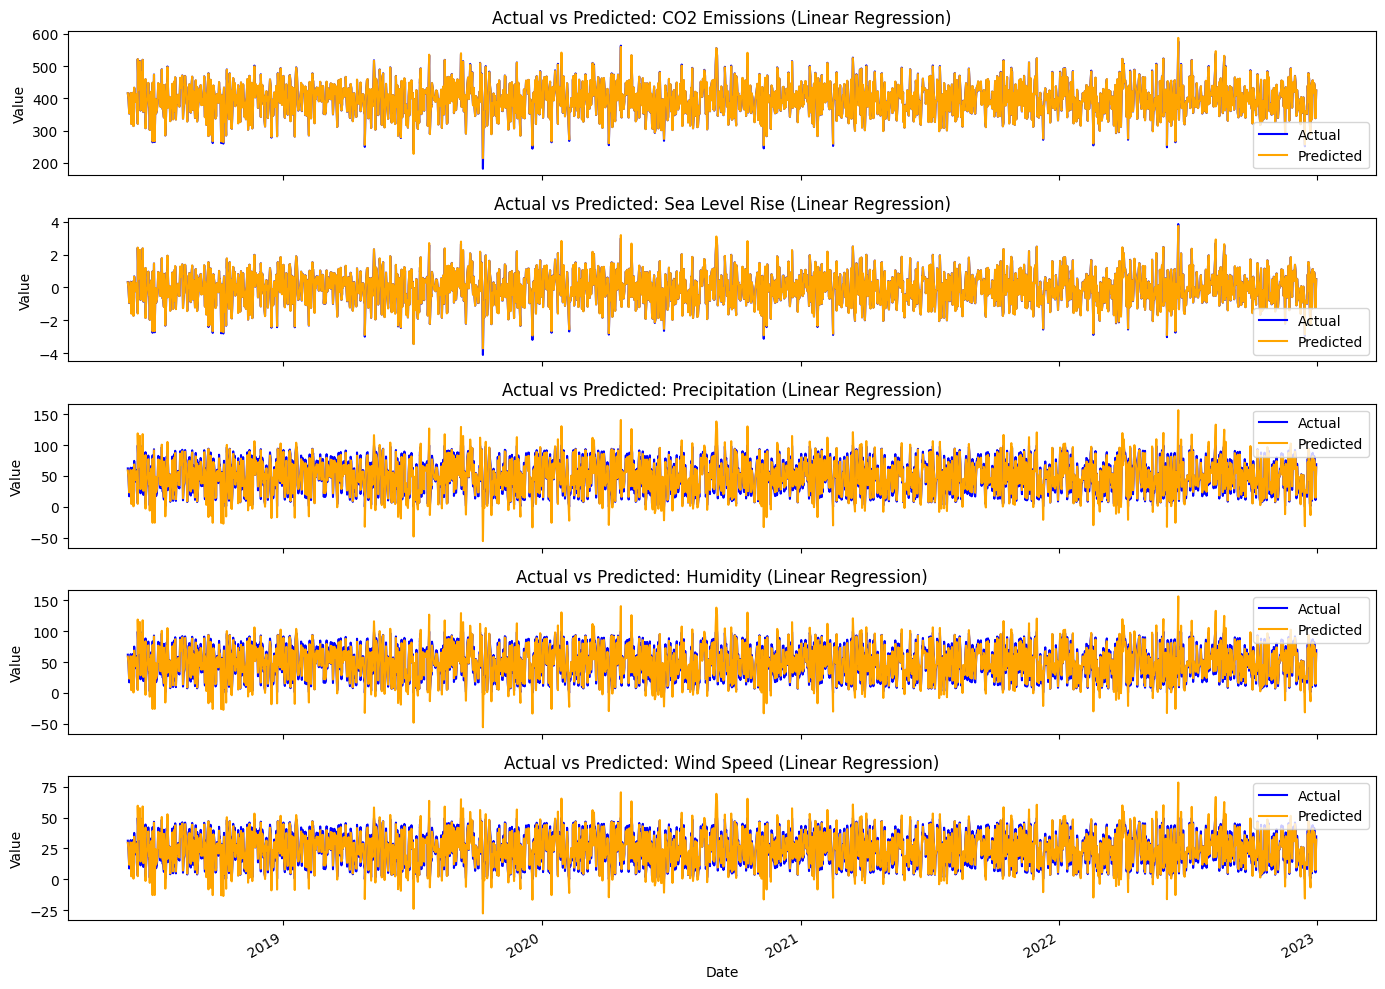

In [ ]:
dates_test = df.index[X_train.shape[0]:X_train.shape[0] + X_test.shape[0]]
dates_test_series = pd.to_datetime(dates_test)

# Filter dates between 2000 and 2022
mask = (dates_test_series.year >= 2000) & (dates_test_series.year <= 2022)
filtered_dates_test = dates_test_series[mask]
y_test_filtered = y_test_inverse[mask]
y_pred_filtered = y_pred_inverse[mask]

# Plot
plt.figure(figsize=(14, 10))
n_features = y_test_filtered.shape[1]

for i in range(n_features):
    plt.subplot(n_features, 1, i + 1)
    plt.plot(filtered_dates_test, y_test_filtered[:, i], label='Actual', color='blue')
    plt.plot(filtered_dates_test, y_pred_filtered[:, i], label='Predicted', color='orange')
    plt.title(f'Actual vs Predicted: {feature_names[i]} (Linear Regression)')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()

##MODEL DEPLOYMENT